# Multiple method comparison on hepatitis_data

In [4]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Read penguins data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()

target = "Baselinehistological staging"

gen_methods = ["tvae", "bayesian_network", "adsgan", "ctgan"]

In [6]:
gen_count = data_real.shape[0]

state = Load(data_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=gen_count, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-17T15:38:55.058915+0200][11156][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|███       | 300/1000 [03:15<07:35,  1.54it/s]
[2024-05-17T15:42:13.355894+0200][11156][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-17T15:42:21.139358+0200][11156][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▌         | 549/10000 [03:18<56:54,  2.77it/s]  
[2024-05-17T15:45:41.353625+0200][11156][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 62%|██████▏   | 1249/2000 [12:50<07:43,  1.62it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [7]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017537,0.002547,0.982463,0.002547
1,pca_eigval_diff,u,0.023005,NaN,0.976995,NaN
2,pca_eigvec_ang,u,0.583583,NaN,0.814240,NaN
3,avg_cio,u,0.303527,0.075989,0.303527,0.075989
4,corr_mat_diff,u,0.921331,NaN,0.997731,NaN
5,mutual_inf_diff,u,2.613649,NaN,0.993562,NaN
6,ks_tvd_stat,u,0.099138,0.011846,0.900862,0.011846
7,frac_ks_sigs,u,0.724138,NaN,0.275862,NaN
8,avg_h_dist,u,0.006817,0.002834,0.993183,0.002834
9,avg_pMSE,u,0.010278,0.000774,0.958889,0.003097


In [8]:
res_df = pd.DataFrame({"Models": gen_methods})

pr_res, ut_res = [], []
for i in range(len(state)):
    pr_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'u']['n_val']))

res_df["Utility"] = ut_res
res_df["Privacy"] = pr_res

res_df

,Models,Utility,Privacy
0,tvae,0.815775,0.797178
1,bayesian_network,0.900679,0.455017
2,adsgan,0.826303,0.730674
3,ctgan,0.821073,0.732599


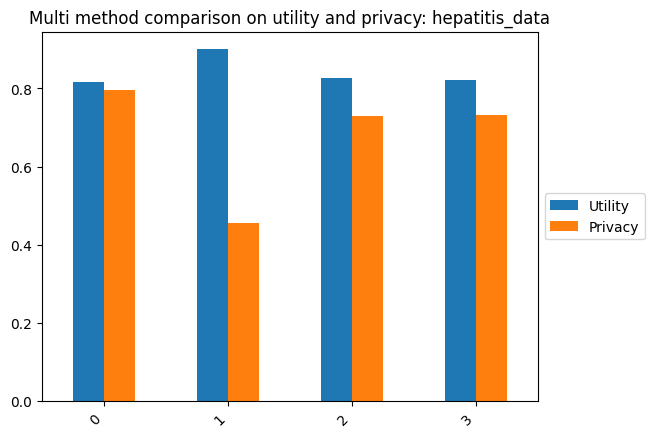

In [9]:
res_df.plot.bar()
plt.title("Multi method comparison on utility and privacy: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [10]:
results_f1 = pd.DataFrame(columns=["f1_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_f1.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"]]
results_f1

,f1_diff
tvae,0.014437
bayesian_network,0.168794
adsgan,0.033176
ctgan,0.028235


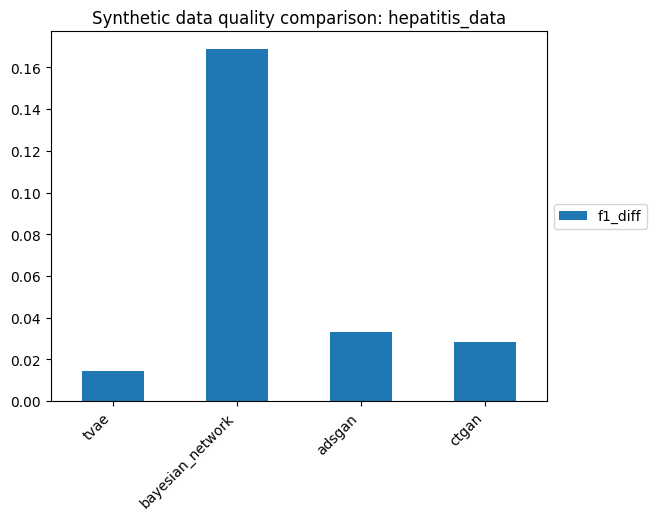

In [11]:
results_f1.plot.bar()
plt.title("Synthetic data quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [12]:
results_DCR = pd.DataFrame(columns=["median_DCR"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_DCR.loc[gen_methods[i]] = [eval.loc["median_DCR", "val"]]
results_DCR

,median_DCR
tvae,1.031296
bayesian_network,0.131699
adsgan,0.976895
ctgan,0.989307


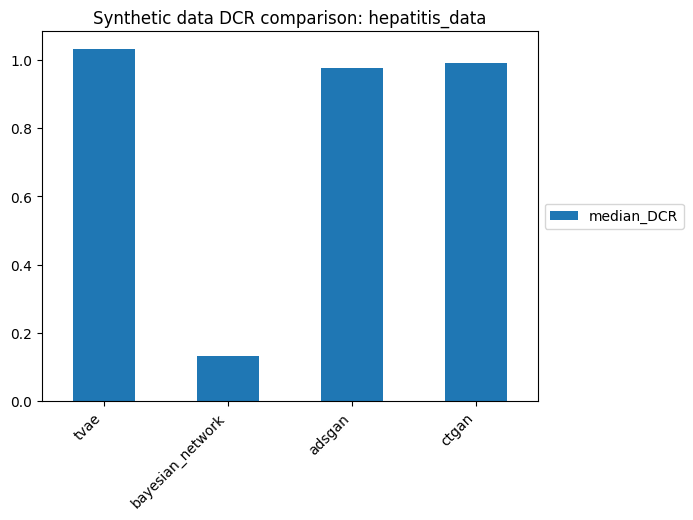

In [13]:
results_DCR.plot.bar()
plt.title("Synthetic data DCR comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [14]:
privacy_results = pd.DataFrame(columns=["eps_identif_risk",
                                        "mia_cls_risk",
                                        "att_discl_risk"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    privacy_results.loc[gen_methods[i]] = [eval.loc["eps_identif_risk", "val"],
                                            eval.loc["mia_cls_risk", "val"],
                                            eval.loc["att_discl_risk", "val"]]
privacy_results

,eps_identif_risk,mia_cls_risk,att_discl_risk
tvae,0.249097,0.735252,0.212125
bayesian_network,0.817690,1.000000,0.362704
adsgan,0.496390,0.995683,0.219271
ctgan,0.508123,0.994245,0.217553


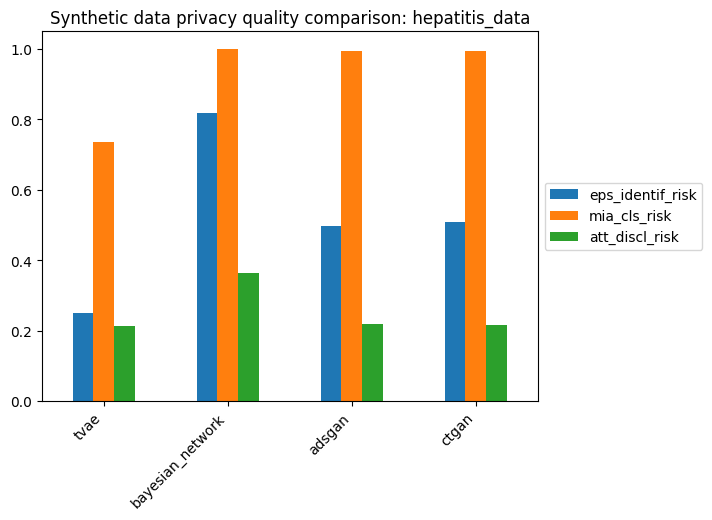

In [15]:
privacy_results.plot.bar()
plt.title("Synthetic data privacy quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [16]:
utility_results = pd.DataFrame(columns=["avg_dwm_diff",
                                        "pca_eigval_diff",
                                        "pca_eigvec_ang"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    utility_results.loc[gen_methods[i]] = [eval.loc["avg_dwm_diff", "val"],
                                            eval.loc["pca_eigval_diff", "val"],
                                            eval.loc["pca_eigvec_ang", "val"]]
utility_results

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
tvae,0.017537,0.023005,0.583583
bayesian_network,0.009842,0.010933,0.241105
adsgan,0.017102,0.011653,0.378475
ctgan,0.027783,0.012948,0.388540


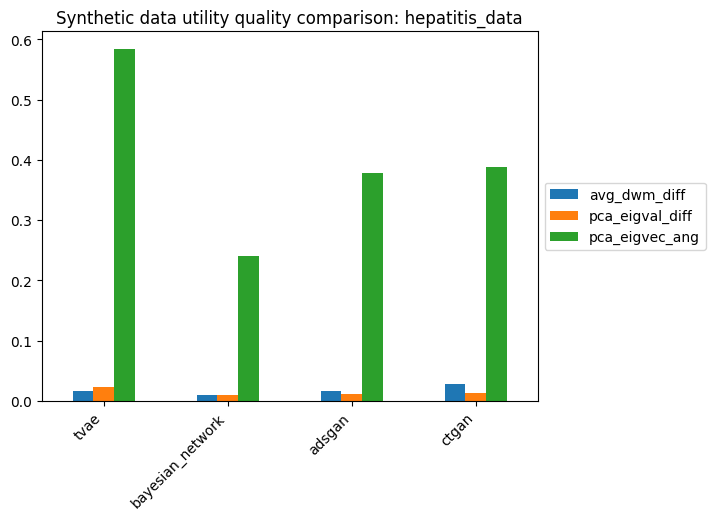

In [17]:
utility_results.plot.bar()
plt.title("Synthetic data utility quality comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [18]:
matrix_results = pd.DataFrame(columns=["corr_mat_diff",
                                        "mutual_inf_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    matrix_results.loc[gen_methods[i]] = [eval.loc["corr_mat_diff", "val"],
                                            eval.loc["mutual_inf_diff", "val"]]
matrix_results

,corr_mat_diff,mutual_inf_diff
tvae,0.921331,2.613649
bayesian_network,0.647131,1.990628
adsgan,0.829988,2.087982
ctgan,0.871964,2.127611


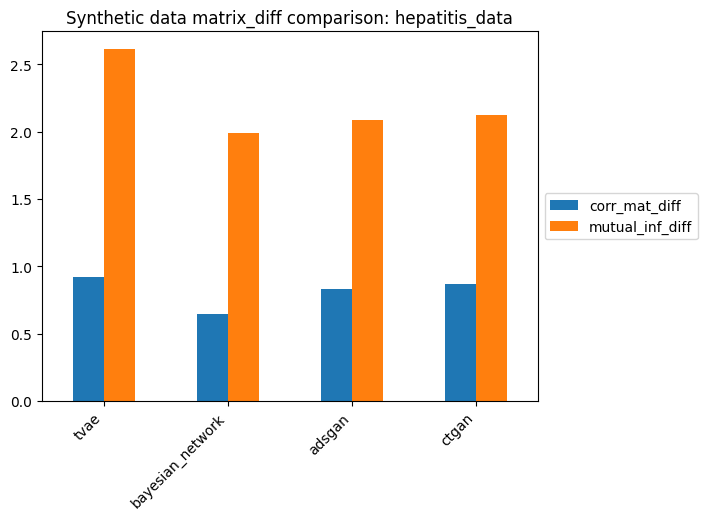

In [19]:
matrix_results.plot.bar()
plt.title("Synthetic data matrix_diff comparison: hepatitis_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()